# Project (2) : Investigate No show appoitment Dataset From Kaggle 
## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis and visualization </a></li>
    
<li><a href="#conclusions">Conclusions</a></li>
</ul>

# Import statements for all of the packages that we will use 


In [5]:
import pandas as pd 
import matplotlib as mt
import matplotlib.pyplot as plt
import seaborn as sn
import numpy as np 
from scipy import stats
import squarify

<a id='intro'></a>
## Introduction

>**Our Dataset talk about  collecting information from 100k medical appointments in Brazil and is focused on the question of whether or not patients show up for their appointment. A number of characteristics about the patient are included in each row**



### More about our data attributes  : 
- **ScheduledDay** : tells us on what day the patient set up their appointment (Type : Date)
- **Neighborhood** : indicates the location of the hospital with respect to home (String)
- **Scholarship**  : indicates whether or not the patient is enrolled in Brasilian welfare program Bolsa Família where (0) for not and (1) for enrolled  (Type : int)
- **no-show** : it says'No' if the patient showed up to their appointment, and 'Yes' if they did not show up (Type :String)
- **Gender** : indicates gender type where (F) if patient is female and (M) if patient is male (Type : String)
- **Hipertension** : indicates if patient suffer from Hipertension where (0) doesnt suffer , (1) suffer (Type : int)
- **Diabetes** : indicates if patient suffer from Diabetes where (0) doesnt suffer , (1) suffer (Type : int)	
- **Alcoholism** : indicates if patient alcoholic or nor where (0) not alcoholic , (1) alcoholic (Type : int)	
- **Handcap** :   indicates if patient  is a  handicap person or not  where range  (0:4) (Type: int) 
- **SMS_received** : check if patient recieve SMS or not  where (0) for not receiving  , (1) for Receiving ie(Type:int)
- **Age** : a positive number indicate the age of patient and it cannot be negative (Type : int)



# Questions Will be asked (Tap to reach the answer )
##### Our problem Question what factors are important for us to know in order to predict if a patient will show up for their scheduled appointment?
>**Qusetions**:  
            <li><a href="#Age">Does Age afecct ? </a></li>
            <li><a href="#gender"> Does Gender affect ? </a></li>
            <li><a href="#wlf "> Does the enrollment in Brasilian welfare program affect (Scholarship) ? </a></li>
            <li><a href="#ds1 "> Does the patient who suffer from diabetes  affect its coming  ? </a></li>
            <li><a href="#ds2 "> Does the patient who suffer from Hypertension  affect its coming  ? </a></li>
            <li><a href="#NH "> Does the Neighborhood be a factor  ? </a></li>
            <li><a href="#sms "> Does the SMS receiving affect   ? </a></li>
            <li><a href="#alch "> Does Alcohol play role in this  ? </a></li>
            <li><a href="#hn "> Does Handcap affect  ? </a></li>



            
            


<a id='wrangling'></a>
## Data Wrangling
>**steps**: 
            <li><a href="#Loading dataset">Loading Dataset </a></li>
            <li><a href="#Display"> Display Data Content </a></li>
            <li><a href="#prop "> General properties of Data </a></li>
            <li><a href="#clean "> Clean the Data  </a></li>


<a id='Loading dataset'></a>
### Loading a Dataset 

In [7]:
data = pd.read_csv('E:\\data analysis\\professtional\\project 2\\noshowappointments-kagglev2-may-2016.csv')

<a id='Display'></a>

### Diplay data content 

In [8]:
data.head(10)

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No
5,9.598513e+13,5626772,F,2016-04-27T08:36:51Z,2016-04-29T00:00:00Z,76,REPÚBLICA,0,1,0,0,0,0,No
6,7.336882e+14,5630279,F,2016-04-27T15:05:12Z,2016-04-29T00:00:00Z,23,GOIABEIRAS,0,0,0,0,0,0,Yes
7,3.449833e+12,5630575,F,2016-04-27T15:39:58Z,2016-04-29T00:00:00Z,39,GOIABEIRAS,0,0,0,0,0,0,Yes
8,5.639473e+13,5638447,F,2016-04-29T08:02:16Z,2016-04-29T00:00:00Z,21,ANDORINHAS,0,0,0,0,0,0,No
9,7.812456e+13,5629123,F,2016-04-27T12:48:25Z,2016-04-29T00:00:00Z,19,CONQUISTA,0,0,0,0,0,0,No


<a id='prop'></a>

### General properties : 

In [9]:
# showing number of columns and rows :
print('-our data Dimensions  is', data.shape , 'where :\n ',data.shape[0],'is the number of rows (record) \n ',data.shape[1],'is the number of columns ')

-our data Dimensions  is (110527, 14) where :
  110527 is the number of rows (record) 
  14 is the number of columns 


In [10]:
#show some staistical information :
data.describe()

,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,1.105270e+05,1.105270e+05,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,1.474963e+14,5.675305e+06,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026
std,2.560949e+14,7.129575e+04,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873
min,3.921784e+04,5.030230e+06,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172614e+12,5.640286e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173184e+13,5.680573e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.439172e+13,5.725524e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


we have a problem that minmum age is -1 and maximum age is 115 this is illogical age 

<a id='clean'></a>

# Clean the data 

### check and fixing issues in Data   
>  we will check for missing data , Duplicates , incorrect data types 

In [11]:
#info() is the method which will display if there is issues or not 
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   PatientId       110527 non-null  float64
 1   AppointmentID   110527 non-null  int64  
 2   Gender          110527 non-null  object 
 3   ScheduledDay    110527 non-null  object 
 4   AppointmentDay  110527 non-null  object 
 5   Age             110527 non-null  int64  
 6   Neighbourhood   110527 non-null  object 
 7   Scholarship     110527 non-null  int64  
 8   Hipertension    110527 non-null  int64  
 9   Diabetes        110527 non-null  int64  
 10  Alcoholism      110527 non-null  int64  
 11  Handcap         110527 non-null  int64  
 12  SMS_received    110527 non-null  int64  
 13  No-show         110527 non-null  object 
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


### check missing data 

> **Conclusion**:  since Non-Null Count values are similar for all columns this is our reference indicate that no missing values 

### check Duplicates 

In [12]:
# duplicated () return true if there is a reptition and false for no repition 
#sum of duplicated will display us count of how much duplication 
print(pd.DataFrame(data.duplicated ()))
print('sum of duplication is ',sum(data.duplicated ()))

            0
0       False
1       False
2       False
3       False
4       False
...       ...
110522  False
110523  False
110524  False
110525  False
110526  False

[110527 rows x 1 columns]
sum of duplication is  0


> **Conclusion**: 
since sum of duplication is  0 so it indicates that there is no  duplication 


### Rename some columns to be more easier 

In [13]:
data.rename(columns={'No-show':'noshow'},inplace=True)

In [14]:
fltdata=data.drop(["ScheduledDay","AppointmentDay"],axis=1)

In [15]:
#check if there is patient with the same no-show Results :
y=sum(data.duplicated(['PatientId','noshow']))
print('number of patients-Ids duplicated  for same no-show results are   ',y)

number of patients-Ids duplicated  for same no-show results are    38710


In [16]:
# remove duplications occur between pateint id and no show result (same status) :
# as because  patient may have several appoitment and it may attent some and absent from others 
data.drop_duplicates(['PatientId','noshow'],inplace=True)
check=sum(data.duplicated(['PatientId','noshow']))
print('number of patients-Ids duplicated  for same no-show results now are   ',check )

number of patients-Ids duplicated  for same no-show results now are    0


### Fix incorrect data types : 

In [17]:
# ScheduledDay    :   110527 non-null  object 
# AppointmentDay  :   110527 non-null  object 
# both must be changed from object to datetime : 
 
data['ScheduledDay']=pd.to_datetime(data['ScheduledDay'])
data['AppointmentDay']=pd.to_datetime(data['AppointmentDay'])

#check if types are changed in place :
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 71817 entries, 0 to 110524
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype              
---  ------          --------------  -----              
 0   PatientId       71817 non-null  float64            
 1   AppointmentID   71817 non-null  int64              
 2   Gender          71817 non-null  object             
 3   ScheduledDay    71817 non-null  datetime64[ns, UTC]
 4   AppointmentDay  71817 non-null  datetime64[ns, UTC]
 5   Age             71817 non-null  int64              
 6   Neighbourhood   71817 non-null  object             
 7   Scholarship     71817 non-null  int64              
 8   Hipertension    71817 non-null  int64              
 9   Diabetes        71817 non-null  int64              
 10  Alcoholism      71817 non-null  int64              
 11  Handcap         71817 non-null  int64              
 12  SMS_received    71817 non-null  int64              
 13  noshow          71817 non-null

# Discuss some points about patients and thier appoitments :

In [18]:
# check number of patients (unique) :
x=data['PatientId'].nunique()
print('number of patients are  ', x )

number of patients are   62299


we will note that there is only 62299 unique patients from the total records 

In [19]:
#check if the appoitment usually for the same patients or different ones  
x=sum(data['PatientId'].duplicated())
print('number of patients-Ids duplicated  for different appoitment  are   ', x )

number of patients-Ids duplicated  for different appoitment  are    9518


<a id='eda'></a>
## Exploratory Data Analysis
>  In this section of the report we will maximize potential of our analysis and visualization 

## Removing outliers :

>we notice that some values of age have negative value from decrptive analysis we make above ana this is illogical so , we remove them as they are out of range which we called ouliers 

In [20]:
# get number of negative values filled in age attributes :
# get number of values more than 100 which is illogical 
# drop both of them from original dataset 
morethan=data[ data["Age"] > 100 ]
len(morethan)
for row in morethan.iterrows():
    data.drop(row[0],inplace=True)
lessthan=data[ data["Age"] <0]
for row in lessthan.iterrows():
    data.drop(row[0],inplace=True)

In [21]:
#check if we have cleaned outliers 
data.describe()

,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,7.181100e+04,7.181100e+04,71811.000000,71811.000000,71811.000000,71811.000000,71811.000000,71811.000000,71811.000000
mean,1.466102e+14,5.666490e+06,36.522399,0.095542,0.195068,0.070964,0.025038,0.020108,0.335575
std,2.544705e+14,7.313174e+04,23.371018,0.293965,0.396256,0.256767,0.156241,0.155257,0.472194
min,3.921784e+04,5.030230e+06,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.175933e+12,5.631620e+06,17.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.188758e+13,5.672880e+06,36.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.457487e+13,5.716564e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999816e+14,5.790484e+06,100.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


minimum age become zero insttead of -1 , maximum age  become  100 instead of 115 

## Data visualization 

# (Histograms for each column to show thier distributions  )

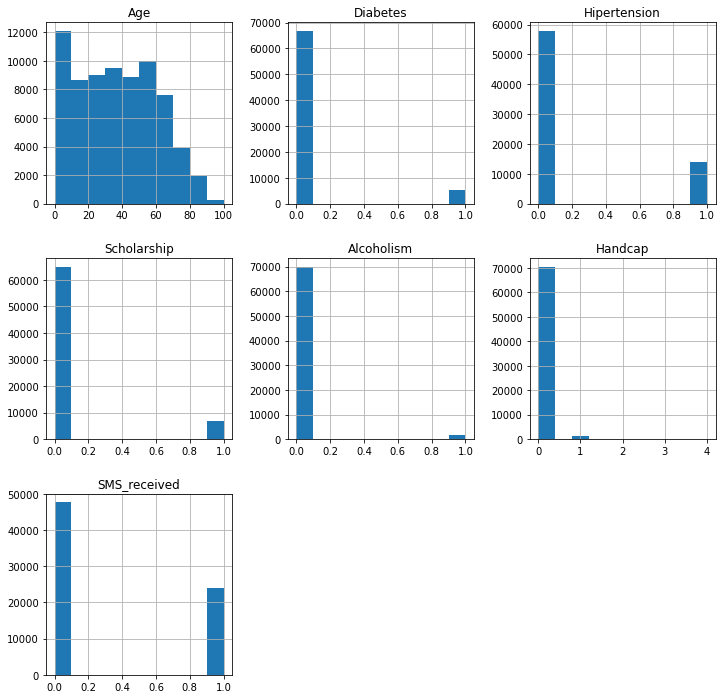

In [22]:
data[['Age' , 'Diabetes' , 'Hipertension','Scholarship' ,'Alcoholism','Handcap','SMS_received','noshow']].hist(figsize=(12,12));


- Most patients dont suffer from niethier diabetes nor Handcape 
- About 18% Have no hipertension 
- Patients who dont recieved SMS-messages is about half those who recieve 
- (Most) patient ar not taking alcohol only about 5% taking 
- About 9%  exsist in scholarship system (welfare program)

### Filter data by 'noshow' attribute : 

In [23]:
n =data[data['noshow']=='No'] # data frame containing reccords depending on no show be no refer that this patient comes on its appoitment 
show=n['noshow']              # sub-set of the column containig noshow==no 
n.head(4)

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,noshow
0,2.987250e+13,5642903,F,2016-04-29 18:38:08+00:00,2016-04-29 00:00:00+00:00,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29 16:08:27+00:00,2016-04-29 00:00:00+00:00,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29 16:19:04+00:00,2016-04-29 00:00:00+00:00,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29 17:29:31+00:00,2016-04-29 00:00:00+00:00,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No


In [24]:
w =data[data['noshow']=='Yes'] # data frame containing reccord depending on no show be Yes refer that this patient doesnt come on its appoitment
no_show=w['noshow'] # sub-set of the column containig noshow==yes
w.head(4)

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,noshow
6,7.336882e+14,5630279,F,2016-04-27 15:05:12+00:00,2016-04-29 00:00:00+00:00,23,GOIABEIRAS,0,0,0,0,0,0,Yes
7,3.449833e+12,5630575,F,2016-04-27 15:39:58+00:00,2016-04-29 00:00:00+00:00,39,GOIABEIRAS,0,0,0,0,0,0,Yes
11,7.542951e+12,5620163,M,2016-04-26 08:44:12+00:00,2016-04-29 00:00:00+00:00,29,NOVA PALESTINA,0,0,0,0,0,1,Yes
17,1.479497e+13,5633460,F,2016-04-28 09:28:57+00:00,2016-04-29 00:00:00+00:00,40,CONQUISTA,1,0,0,0,0,0,Yes


In [25]:
miss=data.noshow=='Yes'
come=data.noshow=='No'
print("Data about patients who miss the appointment : ")
print(data[miss].count() )
print("Data about patients who show up to  the appointment : ")
print(data[come].count() )

Data about patients who miss the appointment : 
PatientId         17662
AppointmentID     17662
Gender            17662
ScheduledDay      17662
AppointmentDay    17662
Age               17662
Neighbourhood     17662
Scholarship       17662
Hipertension      17662
Diabetes          17662
Alcoholism        17662
Handcap           17662
SMS_received      17662
noshow            17662
dtype: int64
Data about patients who show up to  the appointment : 
PatientId         54149
AppointmentID     54149
Gender            54149
ScheduledDay      54149
AppointmentDay    54149
Age               54149
Neighbourhood     54149
Scholarship       54149
Hipertension      54149
Diabetes          54149
Alcoholism        54149
Handcap           54149
SMS_received      54149
noshow            54149
dtype: int64


- number of patients dont come on thier appointment :  17663

- number of patients  come on thier appointment :  54153

- number of patients dont come on thier appointment is three times number of patients come on thier appointment 

In [26]:
data.groupby(['noshow']).sum()

,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
noshow,,,,,,,,,
No,7.948956e+18,307159678196,2015637,4946,10989,3946,1278,1131,16095
Yes,2.579269e+18,99756649748,607073,1915,3019,1150,520,313,8003


In [27]:
data.groupby(['noshow']).mean()

,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
noshow,,,,,,,,,
No,1.467978e+14,5.672490e+06,37.223901,0.091341,0.202940,0.072873,0.023602,0.020887,0.297235
Yes,1.460350e+14,5.648095e+06,34.371702,0.108425,0.170932,0.065112,0.029442,0.017722,0.453120


- we note that Average of patients dont come on appointment have recieved SMS of 0.453095 

In [28]:
# to draw histograms between certain attribute and noshow attribute :

def histodraw(attribute="",color1="",n=6,m=6, color2=""):
    plt.figure(figsize=(n,m))
    plt.hist(data[attribute][come] , bins=12, alpha=0.2, label='come on appointment ',   color=color1 )
    plt.hist(data[attribute][miss] , bins=12, alpha=0.6, label='missed the appointment  ', color=color2)
    plt.xlabel(attribute)
    plt.ylabel('number of patients')
    plt.title('comparing with respect  to '+attribute+ ' :')
    plt.legend();
    print('-number of patients subdivided with respect to  '+attribute +  ':')
    print(data[attribute].value_counts())

    print('\n')
    print('-Categorization numbers :' )
    print(data.groupby(['noshow',attribute])['noshow'].count())




# Answering the Questions with visulaization and statistics 

<a id='Age'></a>

##### - Does age be a factor to come in appointment ?

-number of patients subdivided with respect to  Age:
0      2401
1      1614
2      1189
3      1067
5      1050
       ... 
96       15
97        9
98        5
100       3
99        1
Name: Age, Length: 101, dtype: int64


-Categorization numbers :
noshow  Age
No      0      1828
        1      1245
        2       967
        3       838
        4       707
               ... 
Yes     94        6
        95        4
        96        1
        97        2
        98        1
Name: noshow, Length: 200, dtype: int64


count    71811.000000
mean        36.522399
std         23.371018
min          0.000000
25%         17.000000
50%         36.000000
75%         55.000000
max        100.000000
Name: Age, dtype: float64

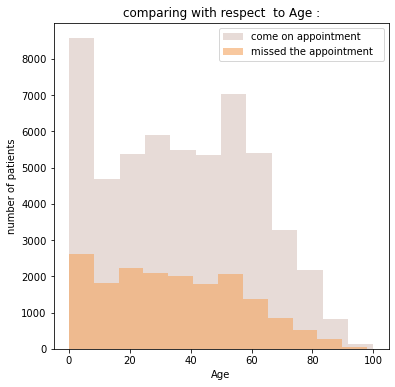

In [29]:
histodraw(attribute="Age",color1 ="#8B4C39",color2="#F4A460")
data["Age"].describe()

>we note that ranges of patients come on appointment increase at ages 0:10 approximately then continous decreasing at 11:28 and slightly increase again at ages 28:38 approximately then decrease at ages 38:45 and then increases again at ages 45:70 approximately and then continous decreasing gradually from 70 to be very small ratio at ages 85:90

> **Note** : there is  strong correlation between Age  and show patients on time 


In [30]:
from importlib import reload
plt=reload(plt)

<a id='gender'></a>

#### Does gender be a factor ? 

In [31]:
data.groupby(['Gender']).sum()

,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
Gender,,,,,,,,,
F,6.771303e+18,263223896252,1782410,5604,9797,3541,708,794,16173
M,3.756923e+18,143692431692,840300,1257,4211,1555,1090,650,7925


In [32]:
data.groupby(['Gender']).mean()

,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
Gender,,,,,,,,,
F,1.457417e+14,5.665481e+06,38.363574,0.120617,0.210865,0.076214,0.015239,0.017090,0.348098
M,1.482021e+14,5.668341e+06,33.147929,0.049586,0.166114,0.061341,0.042998,0.025641,0.312623


-number of patients subdivided with respect to  Gender:
F    46461
M    25350
Name: Gender, dtype: int64


-Categorization numbers :
noshow  Gender
No      F         34956
        M         19193
Yes     F         11505
        M          6157
Name: noshow, dtype: int64


count     71811
unique        2
top           F
freq      46461
Name: Gender, dtype: object

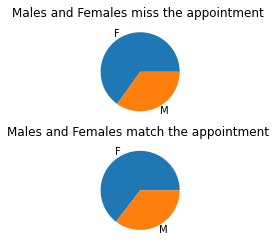

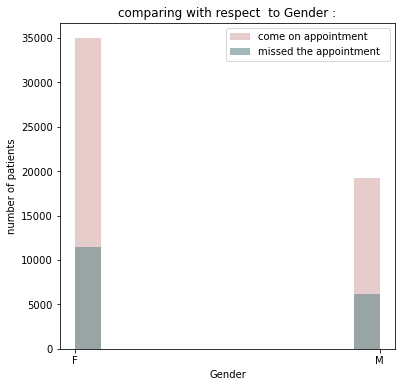

In [33]:
fig, axes = plt.subplots(nrows=2, ncols=1)
axes[0].pie(data["Gender"][miss].value_counts(normalize=True),labels =['F','M'])
axes[0].set_title("Males and Females miss the appointment ")
axes[1].pie(data["Gender"][come].value_counts(normalize=True),labels =['F','M'])
axes[1].set_title("Males and Females match the appointment ")


histodraw(attribute="Gender",color1='#8B0000',color2="#668B8B")
#histodraw(attribute="Gender",color1='#8B0000',color2="#668B8B")
data["Gender"].describe()

**we Notice that**:
- number of female patients is larger than male patients 
- number of female patients come on appointment is about 3 times who miss 
- number of male patients come on appointment is about 3 times who miss 



> **Note** : we can say that both male and female have similar ratio of miss and follow the appoinment so attendence of patient doesnt depend on its gender 

<a id='wlf'></a>

#####  Does the Enrollment in Brasilian welfare program  affect ? 

-number of patients subdivided with respect to  Scholarship:
0    64950
1     6861
Name: Scholarship, dtype: int64


-Categorization numbers :
noshow  Scholarship
No      0              49203
        1               4946
Yes     0              15747
        1               1915
Name: noshow, dtype: int64


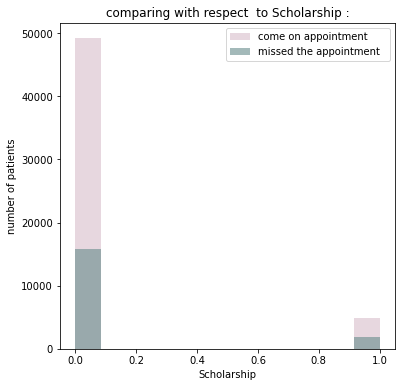

In [34]:
histodraw("Scholarship",color1="#8B3A62",color2="#668B8B")


**we Notice that**:
- number non enrolled patients (64955) in welfare program larger than those who enrolled (6861) for about 9.5 times 
- number of patients who come on appointment and didn't enroll in welfare program (49207) is larger than those who come on appointment but enroll in welfare program (4946) for about 10 times 
- number of patients who miss the  appointment and didn't enroll in welfare program (15748) is larger than those who miss the appointment but enroll in welfare program (1915) for about 8 times 


> **Note** : there is no strong correlation between enrolled in welfare program and coming of patients on time 


<a id='ds1'></a>

#####  Does the patient who suffer from diabetes  affect its coming  ? 

-number of patients subdivided with respect to  Diabetes:
0    66715
1     5096
Name: Diabetes, dtype: int64


-Categorization numbers :
noshow  Diabetes
No      0           50203
        1            3946
Yes     0           16512
        1            1150
Name: noshow, dtype: int64


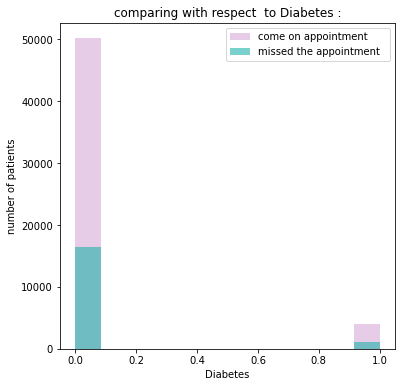

In [35]:
histodraw("Diabetes",color1="#8B008B",color2="#20B2AA")

**we Notice that**:
- number of patients dont suffer from diabetes (66720) is larger than those who suffer (5096) for about 13 times 
- number of patients showed up to thier appointment and dont suffer from diabetes  (50207) is larger than those who showed up but suffer (3946) for about 12.5 times 
- number of patients dont showed up to thier appointment and dont suffer from diabetes (16513) is larger than those who showed up but suffer (1150) for about 14 times 

> **Note** : there is no strong correlation between suffering from diabetes  and show patients on time 


<a id='ds2'></a>

#####  Does the patient who suffer from Hypertension  affect its coming  ? 

-number of patients subdivided with respect to  Hipertension:
0    57803
1    14008
Name: Hipertension, dtype: int64


-Categorization numbers :
noshow  Hipertension
No      0               43160
        1               10989
Yes     0               14643
        1                3019
Name: noshow, dtype: int64


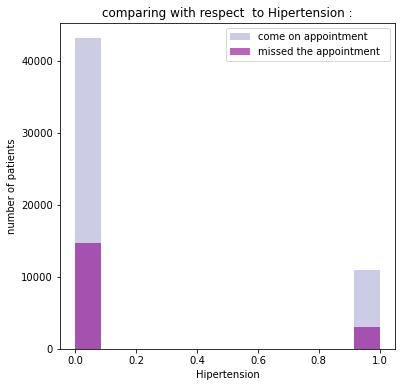

In [36]:
histodraw("Hipertension",color1='#000080',color2="#8B008B")

**we Notice that**:
- number of patients dont suffer from Hipertension (57807) is larger than those who suffer (14009) for about 4 times 
- number of patients showed up to thier appointment and dont suffer from Hipertension  (43163) is larger than those who showed up but suffer (10990) for about 4 times 
- number of patients dont showed up to thier appointment and dont suffer from Hipertension (14644) is larger than those who showed up but suffer (3019) for about 5 times 

> **Note** : there is no strong correlation between suffering from hypertension  and show patients on time 


<a id='alch'></a>
##### Does Alcohol play role in this ? 

-number of patients subdivided with respect to  Alcoholism:
0    70013
1     1798
Name: Alcoholism, dtype: int64


-Categorization numbers :
noshow  Alcoholism
No      0             52871
        1              1278
Yes     0             17142
        1               520
Name: noshow, dtype: int64


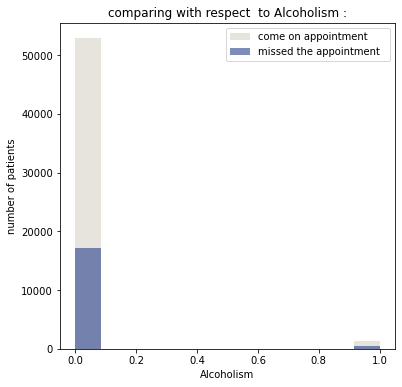

In [37]:
histodraw('Alcoholism',color1="#8B795E",color2="#27408B")

**we Notice that**:
- number of non alcholic patients (70018) is larger than those alcholic (1798) about 70 times 
- number of patients showed up to thier appointment and non alcholic  (52875) is larger than those who are alcholic (1278) about 40 times 
- number of patients dont showed up to thier appointment and non alcholic (17143) is larger than those who are alcholic  (520)  about 30 times

> **Note** : there is no strong correlation between suffering from Alcoholism  and show patients on time 
 it is insignificant 

<a id='hn'></a>

#### Does Handcap affect ?

-number of patients subdivided with respect to  Handcap:
0    70508
1     1176
2      116
3        8
4        3
Name: Handcap, dtype: int64


-Categorization numbers :
noshow  Handcap
No      0          53123
        1            930
        2             89
        3              5
        4              2
Yes     0          17385
        1            246
        2             27
        3              3
        4              1
Name: noshow, dtype: int64


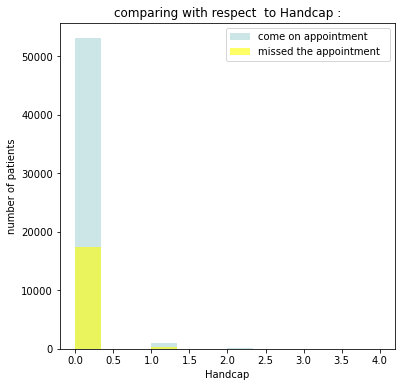

In [38]:
histodraw('Handcap',color1="#00868B",color2="#FFFF00")

> **Note** : there is no strong correlation between the patient be Handcap or not 
 it is insignificant 

<a id='sms'></a>
##### Is there a realationship between  "Receiving SMS" and the loyality of patient to its appointment ? 

-number of patients subdivided with respect to  SMS_received:
0    47713
1    24098
Name: SMS_received, dtype: int64


-Categorization numbers :
noshow  SMS_received
No      0               38054
        1               16095
Yes     0                9659
        1                8003
Name: noshow, dtype: int64


count    71811.000000
mean         0.335575
std          0.472194
min          0.000000
25%          0.000000
50%          0.000000
75%          1.000000
max          1.000000
Name: SMS_received, dtype: float64

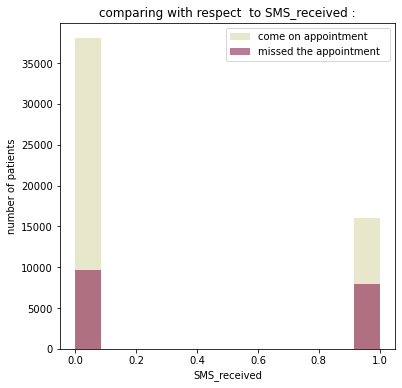

In [39]:
histodraw('SMS_received',color1="#8B8B00",color2="#8B2252")
data['SMS_received'].describe()

> **Note** : there is  strong correlation between SMS recieving  and show patients on time but the strange here is that precent of patients recieved SMS and miss the appointment is larger than who dont recieve and show up to the appointment 

**we need to Revise SMS System** 

<a id='NH'></a>
##### Is there a realationship between  "Neighbourhood" and the loyality of patient to its appointment ? 

Sammary:
count              71811
unique                81
top       JARDIM CAMBURI
freq                4800
Name: Neighbourhood, dtype: object


Categorization :
noshow  Neighbourhood      
No      AEROPORTO                6
        ANDORINHAS             996
        ANTÔNIO HONÓRIO        155
        ARIOVALDO FAVALESSA    152
        BARRO VERMELHO         189
                              ... 
Yes     SÃO JOSÉ               293
        SÃO PEDRO              407
        TABUAZEIRO             465
        UNIVERSITÁRIO           24
        VILA RUBIM             117
Name: noshow, Length: 160, dtype: int64


Count Frequency of each site :
JARDIM CAMBURI                 4800
MARIA ORTIZ                    3844
RESISTÊNCIA                    2780
JARDIM DA PENHA                2696
ITARARÉ                        2470
                               ... 
ILHA DO BOI                      24
AEROPORTO                         7
ILHA DO FRADE                     6
ILHAS OCEÂNICAS DE TRINDADE

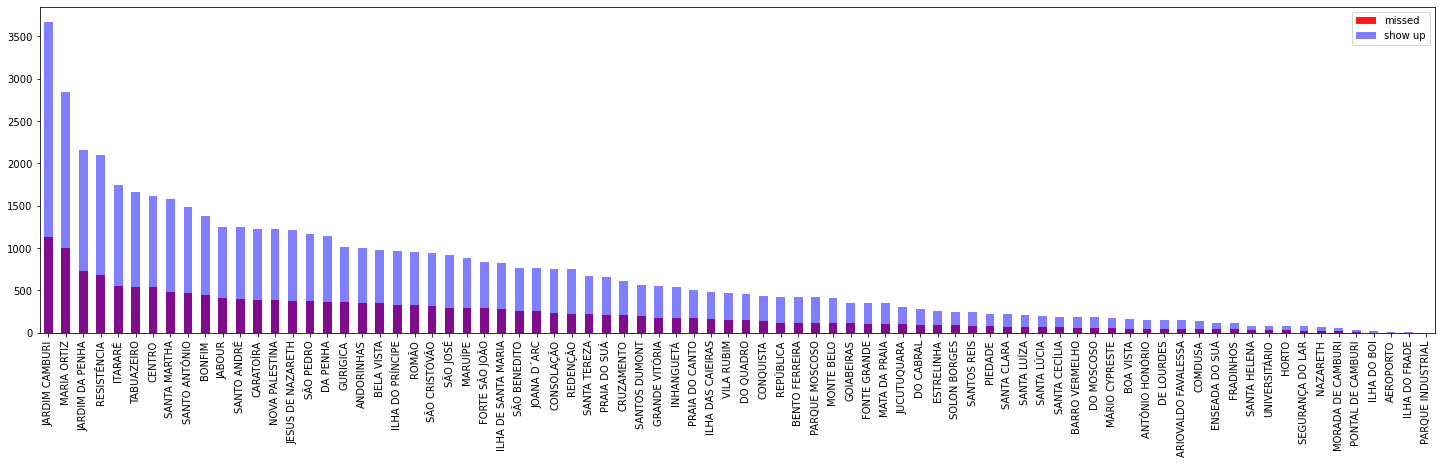

In [40]:
plt.figure(figsize=[25,6])
print("Sammary:")
data["Neighbourhood"][miss].value_counts().plot(kind="bar",label="missed",color="red",alpha=0.9)
data["Neighbourhood"][come].value_counts().plot(kind="bar",label="show up",color="blue",alpha=0.5)
plt.legend()
print((data["Neighbourhood"]).describe())
print("\n")
print("Categorization :")
print(data.groupby(['noshow',"Neighbourhood"])['noshow'].count())
print("\n")
print("Count Frequency of each site :")
x=data["Neighbourhood"].value_counts()[:len(data)].sort_values(ascending=False)
print(x)


- we have total 71816 records of about 81 unique sites 
- the most Frquent site is  : JARDIM CAMBURI of about 4800  times
- the least frequent sit is : 'PARQUE INDUSTRIAL ' of about 1 times
- logically we notice that some patients from same sites have high ratio to show up on thier appointment than other           areas may be those sites are more near to the hospital than the others 

    


<a id='conclusions'></a>
# Conclusions :


> - most affective attributes are Age , niegbourhood , SMS which play an esstentials roles as  factors for attendtence of   patients on thier appointments 
>- **we need to Revise SMS System** as number of patients recieved SMS and miss the appointment is larger than who dont   recieve and show up to the appointment and this is illogical 
> - you have patients from abou 81 nieghbourhood sites  where  the most Frquent site is  : JARDIM CAMBURI of about 4800  times and the least frequent sit is : 'PARQUE INDUSTRIAL ' of about 1 times
>- smaller age ranges from 0 to 8 the most category showed up on thier appointment which is the peak of the histogram (first maximum category )
followed by ages from 45 to 60 approximately is the second maximum category 

### Limitations

>**No clear correlation between chronic diseasee such as diabetes , hypertension , or being handcap or alcoholic and showing the patient in its appointment**  

> **Also no clear relation between enrollment in welfare program and the attendence of the patient**

>**we dont care about appointment and schedule date this is irrelevant data for this problem**

>**showing patient up to its appointment doesnt depend on its gender (male of female)**
